# Практическое задание № 2. Нейронные сети


**Работу выполнил (а):**

Ткачёв Игорь Юрьевич, 368912

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [87]:
train_data = pd.read_csv('/content/drive/MyDrive/itmo_ai/lab2/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/itmo_ai/lab2/test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [88]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [89]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [55]:
missing_value_checker(test_edited)

[]
0


In [56]:
missing_value_checker(train_edited)

[]
0


In [90]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [58]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [12]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [135]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [107]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [161]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler


model = nn.Sequential(
    nn.Linear(75, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

torch.manual_seed(40)

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [136]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

In [137]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))

In [138]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [139]:
num_epochs = 500
batch_size = 32
learning_rate = 0.001

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_val, y_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [140]:
def train_loop(train_loader, criterion, optimizer, model):
  train_loss = 0
  for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += loss.item()

  train_loss /= len(train_loader)
  return train_loss


In [141]:
def test_loop(test_loader, criterion, model):
  test_loss = 0
  mae = 0
  r2 = 0
  for batch_X, batch_y in train_loader:
        with torch.no_grad():
          predictions = model(batch_X)
          loss = criterion(predictions, batch_y)

          test_loss += loss.item()

  test_loss /= len(test_loader)
  with torch.no_grad():
      predictions = model(X_val)
      mae = torch.mean(torch.abs(predictions - y_val)).item()
      r2 = 1 - (torch.sum((y_val - predictions) ** 2) / torch.sum((y_val - torch.mean(y_val)) ** 2)).item()

  return test_loss, mae, r2

In [142]:
loss_history = {"train": [], "test": []}
scores_history = {"R2": [], "MAE": []}

for epoch in range(num_epochs):
    train_loss = train_loop(train_loader, criterion, optimizer, model)
    test_loss, mae, r2 = test_loop(test_loader, criterion, model)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
    scores_history['R2'].append(r2)
    scores_history['MAE'].append(mae)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train loss: {train_loss:.4f}, Validation loss: {test_loss:.4f}")

Epoch [50/500], Train loss: 0.1705, Validation loss: 0.6180
Epoch [100/500], Train loss: 0.1281, Validation loss: 0.4708
Epoch [150/500], Train loss: 0.1059, Validation loss: 0.3901
Epoch [200/500], Train loss: 0.0901, Validation loss: 0.3293
Epoch [250/500], Train loss: 0.0778, Validation loss: 0.2863
Epoch [300/500], Train loss: 0.0678, Validation loss: 0.2489
Epoch [350/500], Train loss: 0.0592, Validation loss: 0.2179
Epoch [400/500], Train loss: 0.0521, Validation loss: 0.1928
Epoch [450/500], Train loss: 0.0504, Validation loss: 0.1704
Epoch [500/500], Train loss: 0.0417, Validation loss: 0.1544


**Оцените полученные результаты**

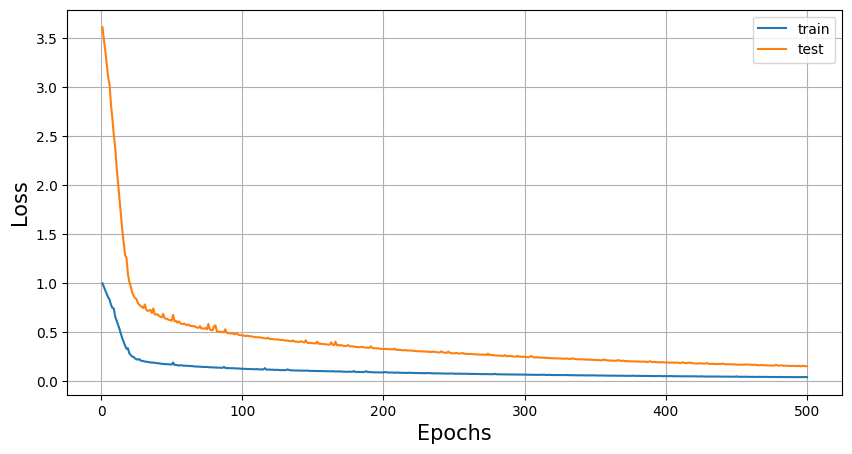

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.show()

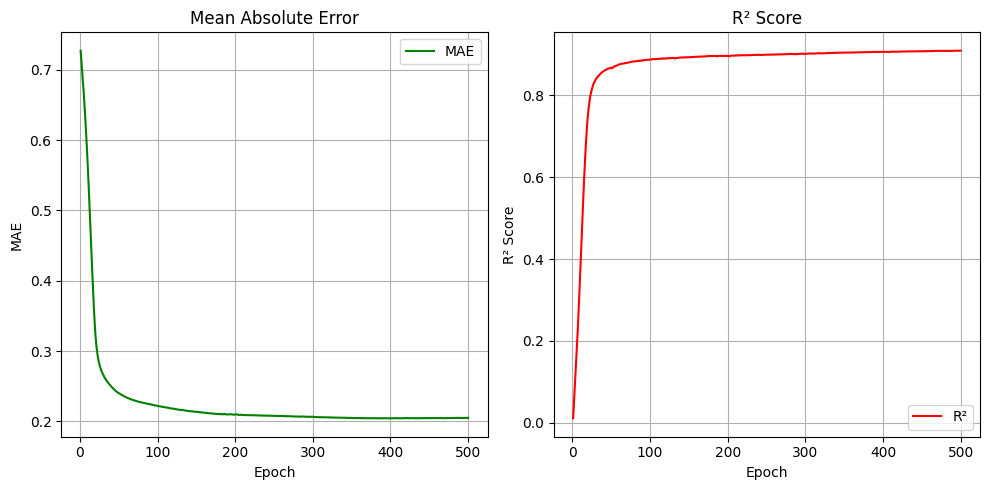

In [144]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)

plt.plot(range(1, num_epochs + 1), scores_history['MAE'], label='MAE', color='green')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)

plt.plot(range(1, num_epochs + 1), scores_history['R2'], label='R²', color='red')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('R² Score')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [148]:
print(f"MAE: {scores_history['MAE'][-1]:.4f}, MSE: {loss_history['test'][-1]:.4f}, R2: {scores_history['R2'][-1]:.4f}")

MAE: 0.2050, MSE: 0.1544, R2: 0.9094


Попробуем другие параметры

In [152]:
num_epochs = 500
batch_size = 64
learning_rate = 0.0001

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_val, y_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [153]:
loss_history = {"train": [], "test": []}
scores_history = {"R2": [], "MAE": []}

for epoch in range(num_epochs):
    train_loss = train_loop(train_loader, criterion, optimizer, model)
    test_loss, mae, r2 = test_loop(test_loader, criterion, model)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
    scores_history['R2'].append(r2)
    scores_history['MAE'].append(mae)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train loss: {train_loss:.4f}, Validation loss: {test_loss:.4f}")

Epoch [50/500], Train loss: 0.8878, Validation loss: 3.3747
Epoch [100/500], Train loss: 0.7864, Validation loss: 3.1690
Epoch [150/500], Train loss: 0.6741, Validation loss: 2.5602
Epoch [200/500], Train loss: 0.5616, Validation loss: 2.0583
Epoch [250/500], Train loss: 0.4271, Validation loss: 1.6764
Epoch [300/500], Train loss: 0.3392, Validation loss: 1.3147
Epoch [350/500], Train loss: 0.2765, Validation loss: 1.0603
Epoch [400/500], Train loss: 0.2513, Validation loss: 0.9386
Epoch [450/500], Train loss: 0.2839, Validation loss: 0.8591
Epoch [500/500], Train loss: 0.2154, Validation loss: 0.8157


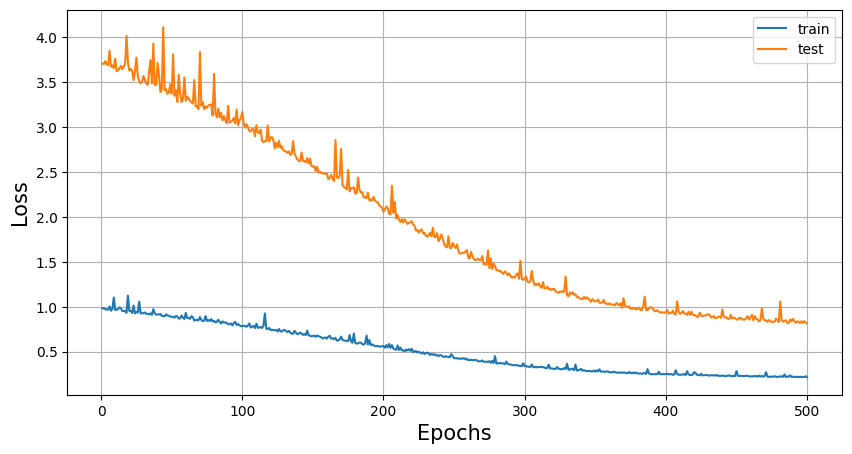

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.show()

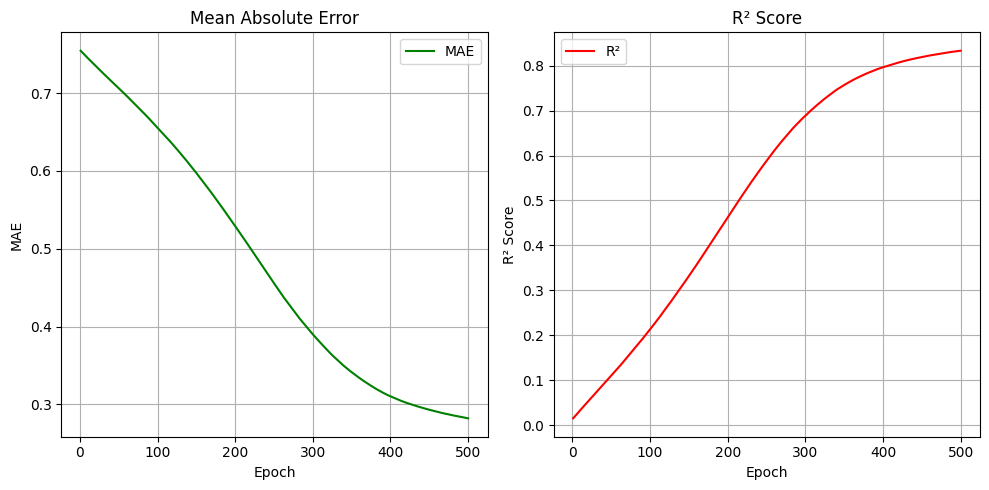

In [155]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)

plt.plot(range(1, num_epochs + 1), scores_history['MAE'], label='MAE', color='green')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)

plt.plot(range(1, num_epochs + 1), scores_history['R2'], label='R²', color='red')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('R² Score')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [156]:
print(f"MAE: {scores_history['MAE'][-1]:.4f}, MSE: {loss_history['test'][-1]:.4f}, R2: {scores_history['R2'][-1]:.4f}")

MAE: 0.2821, MSE: 0.8157, R2: 0.8332


Попробуем другую функцию потерь и оптимизатор


In [162]:
num_epochs = 500
batch_size = 32
learning_rate = 0.001

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_val, y_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [163]:
loss_history = {"train": [], "test": []}
scores_history = {"R2": [], "MAE": []}

for epoch in range(num_epochs):
    train_loss = train_loop(train_loader, criterion, optimizer, model)
    test_loss, mae, r2 = test_loop(test_loader, criterion, model)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
    scores_history['R2'].append(r2)
    scores_history['MAE'].append(mae)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train loss: {train_loss:.4f}, Validation loss: {test_loss:.4f}")

Epoch [50/500], Train loss: 0.0507, Validation loss: 0.1502
Epoch [100/500], Train loss: 0.0351, Validation loss: 0.1206
Epoch [150/500], Train loss: 0.0302, Validation loss: 0.1180
Epoch [200/500], Train loss: 0.0269, Validation loss: 0.0987
Epoch [250/500], Train loss: 0.0252, Validation loss: 0.0975
Epoch [300/500], Train loss: 0.0262, Validation loss: 0.1026
Epoch [350/500], Train loss: 0.0209, Validation loss: 0.0823
Epoch [400/500], Train loss: 0.0220, Validation loss: 0.0679
Epoch [450/500], Train loss: 0.0208, Validation loss: 0.0739
Epoch [500/500], Train loss: 0.0213, Validation loss: 0.0708


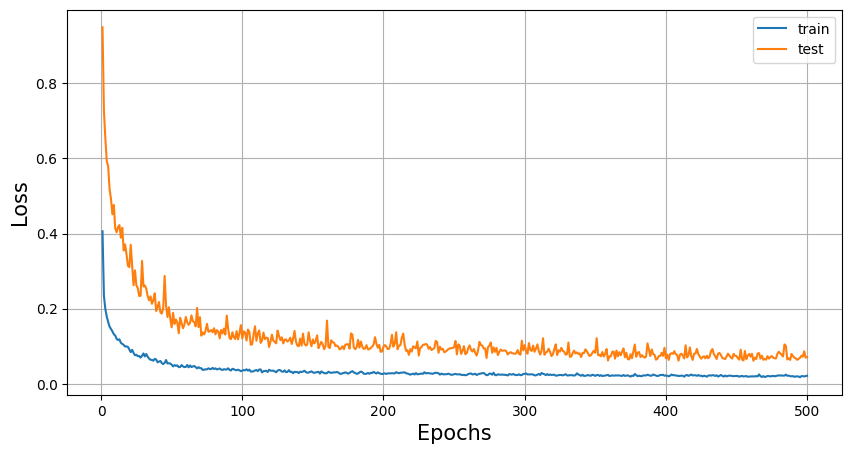

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.show()

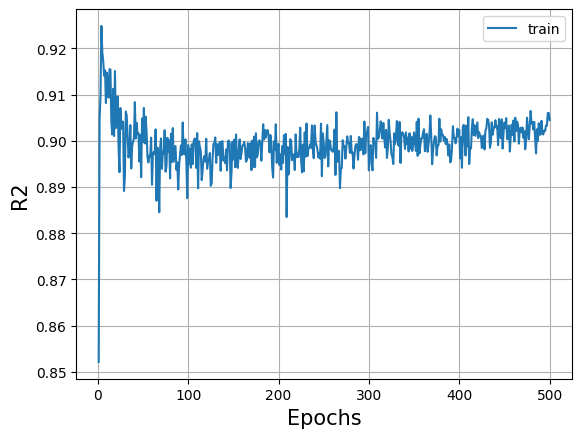

In [168]:
# plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), scores_history['R2'], label="train")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [167]:
print(f"MAE: {loss_history['test'][-1]:.4f}, R2: {scores_history['R2'][-1]:.4f}")

MAE: 0.0708, R2: 0.9045


### Прогнозирование

In [172]:
X_test = torch.tensor(test_edited.values, dtype=torch.float32)

In [173]:
X_test = scaler_X.fit_transform(X_test)

In [174]:
preds = None
model.eval()
with torch.no_grad():
    preds = model(torch.tensor(X_test, dtype=torch.float32))
preds

tensor([[-0.7089],
        [-0.1319],
        [ 0.1089],
        ...,
        [-0.1148],
        [-0.7350],
        [ 0.7932]])

In [175]:
preds = scaler_y.inverse_transform(preds.numpy())

In [177]:
#пример
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output


,Id,SalePrice
0,1461,124646.695312
1,1462,170357.078125
2,1463,189426.375000
3,1464,193970.140625
4,1465,179117.484375
...,...,...
1454,2915,90031.117188
1455,2916,76236.609375
1456,2917,171704.765625
1457,2918,122582.539062
